In [1]:
# Submarine melting Qsm under different subglacial discharges Qsg and sill depths
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Obtain submarine melting Qsm
def IFA_deep(datapath, case_id):
    # Grid areas
    Area = np.empty([90, 10])
    Area[:20,:] = 400
    Area[20:50,:] = 800
    Area[50:,:] = 1200
    file0 = xr.open_dataset(datapath+'/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    file = file0.isel(T=~file0.get_index("T").duplicated()) 
    t0 = 0
    #t0 = 89
    tn = len(file.T)
    state = file.isel(Y=range(35,45), T=range(t0,tn))
    MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
    Qsm = (MR*Area).sum()/(24*3600)
    return Qsm

def IFA_shallow(datapath, case_id):
    # Grid areas
    Area = np.empty([90, 10])
    Area[:20,:] = 200
    Area[20:50,:] = 400
    Area[50:,:] = 600
    file0 = xr.open_dataset(datapath+'/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    file = file0.isel(T=~file0.get_index("T").duplicated()) 
    t0 = 0
    #t0 = 89
    tn = len(file.T)
    state = file.isel(Y=range(35,45), T=range(t0,tn))
    MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
    Qsm = (MR*Area).sum()/(24*3600)
    return Qsm

In [4]:
# Fjord depth h=400m
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_nosill' # hs/h=1
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_maxhs' # hs/h=0.12
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_minhs' # # hs/h=0.04

# Fjord depth h=200m
path4 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord01' # hs/h=0.04
path5 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_Fjord02' # hs/h=0.08
path6 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_Fjord03' # hs/h=0.12
path7 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_Fjord04' # hs/h=0.24
path8 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_Fjord05' # hs/h=1


Qsg = np.array([25,50,100,250,500,1000])

case = np.array([1,2,3,4,5,6])

Qsm1 = np.empty(len(case))
Qsm2 = np.empty(len(case))
Qsm3 = np.empty(len(case))
Qsm4 = np.empty(len(case))
Qsm5 = np.empty(len(case))
Qsm6 = np.empty(len(case))
Qsm7 = np.empty(len(case))
Qsm8 = np.empty(len(case))

for i in range(len(case)):
    Qsm1[i] = IFA_deep(path1,case[i])
    Qsm2[i] = IFA_deep(path2,case[i])
    Qsm3[i] = IFA_deep(path3,case[i])
    Qsm4[i] = IFA_shallow(path4,case[i])
#     Qsm5[i] = IFA_shallow(path5,case[i])
#     Qsm6[i] = IFA_shallow(path6,case[i])
#     Qsm7[i] = IFA_shallow(path7,case[i])
#     Qsm8[i] = IFA_shallow(path8,case[i])

In [5]:
Qsm3,  Qsm4

(array([ 4.13470201,  5.15366742,  6.73799592,  9.91626286, 12.60099934,
        15.41120549]),
 array([1.7526003 , 2.25508554, 2.9000431 , 3.85196895, 4.59744868,
        5.16759772]))

In [33]:
file1 = xr.open_dataset(path4+'/state_001.nc')
u1 = file1.U.data.mean(axis=(0,2))

file2 = xr.open_dataset(path5+'/state_001.nc')
u2 = file2.U.data.mean(axis=(0,2))


file3 = xr.open_dataset(path6+'/state_001.nc')
u3 = file3.U.data.mean(axis=(0,2))

In [34]:
u1[:,178], u2[:,178], u3[:,178]

(array([-2.7316133e-05, -2.0159809e-05, -2.0470095e-06,  6.6996334e-05,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00], dtype=float32),
 array([-8.0641941e-05, -7.3576804e-05, -5.5235771e-05, -2.4963594e-05,
         1.2348320e-05,  4.8706926e-05,  8.1818696e-05,  1.0909353e-04,
         0.0000000e+00,

Text(0.0, 1.0, '(a) $h=400m$')

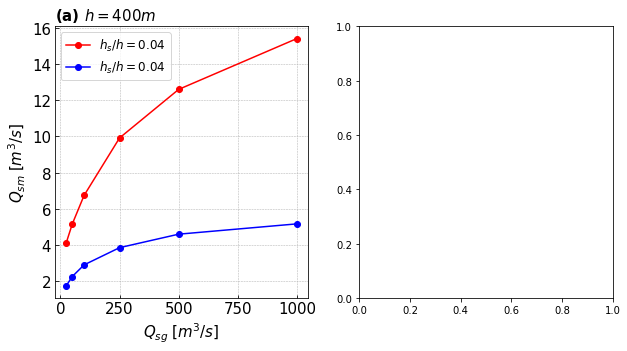

In [6]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

qsg = np.arange(0,1050,50)
#ax.plot(qsg,qsg**(2/5), 'k-',lw=3,alpha=.5,label=r'$Q^{2/5}_{sg}$')
#ax1.plot(Qsg,Qsm1,'o-k',ms=6, lw=1.5,label=r'$h_s/h=1$')
ax1.plot(Qsg,Qsm3,'o-r',ms=6, lw=1.5,label=r'$h_s/h=0.04$')
ax1.plot(Qsg,Qsm4,'o-b',ms=6, lw=1.5,label=r'$h_s/h=0.04$')

ax1.legend(loc='best', fontsize=12)
ax1.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
ax1.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) $h=400m$', loc='left', size=15, weight='bold')


# ax2.plot(Qsg,Qsm4,'o--b',ms=6, lw=1.5,label=r'$h_s=0.04$')
# ax2.plot(Qsg,Qsm5,'o--',ms=6, lw=1.5,label=r'$h_s=0.08$')
# ax2.plot(Qsg,Qsm6,'o--r',ms=6, lw=1.5,label=r'$h_s=0.12$')
# ax2.plot(Qsg,Qsm7,'o--',ms=6, lw=1.5,label=r'$h_s=0.24$')
# ax2.plot(Qsg,Qsm7,'o--k',ms=6, lw=1.5,label=r'$h_s=1$')
# ax2.legend(loc='best', fontsize=12)
# ax2.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
# #ax2.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
# ax2.grid(linestyle='--', linewidth=0.5)
# ax2.tick_params(direction='in', labelsize=15)
# ax2.set_title(r'(b) $h=200m$', loc='left', size=15, weight='bold')

In [ ]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig1.savefig(fig_path + '/6-QsgCase.png', dpi=200, bbox_inches='tight') 
fig2.savefig(fig_path + '/Qsg-Qsm.png', dpi=200, bbox_inches='tight') 